In [1]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud

In [2]:
pd.set_option('display.max_columns', None)
df_london = pd.read_csv(r"C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\.data\london_weather_2014-2024.csv")

In [3]:
#sort index
df_london = df_london.sort_index()

In [4]:
df_london.shape

(3793, 34)

In [5]:
df_london.head()

,Unnamed: 0,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,0,"London, England, United Kingdom",2014-01-01,11.6,6.7,9.1,11.6,3.6,7.0,6.7,84.8,11.857,100,16.67,rain,0.0,0.0,72.4,38.4,190.5,993.1,67.4,14.2,6.9,0.5,0,NaN,2014-01-01T08:06:14,2014-01-01T16:02:04,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03769099999,EGWU,03680099999,03768399999,03672..."
1,1,"London, England, United Kingdom",2014-01-02,11.0,6.6,9.1,11.0,3.6,7.2,6.0,81.0,5.394,100,12.50,rain,0.0,0.0,51.8,29.8,216.2,993.4,47.4,26.7,38.3,3.3,2,NaN,2014-01-02T08:06:07,2014-01-02T16:03:08,0.03,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"03769099999,03680099999,03672099999,0378109999..."
2,2,"London, England, United Kingdom",2014-01-03,10.6,7.3,9.0,10.6,3.2,6.5,5.1,76.8,6.030,100,16.67,rain,0.0,0.0,77.4,33.5,218.4,994.5,52.8,17.9,30.3,2.8,2,NaN,2014-01-03T08:05:56,2014-01-03T16:04:16,0.07,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03769099999,03680099999,03672099999,0378109999..."
3,3,"London, England, United Kingdom",2014-01-04,10.1,4.5,8.0,10.1,2.0,5.1,5.2,82.4,5.239,100,16.67,rain,0.0,0.0,62.1,29.2,206.0,993.6,67.6,22.0,17.4,1.4,1,NaN,2014-01-04T08:05:42,2014-01-04T16:05:25,0.10,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03769099999,03680099999,03672099999,0378109999..."
4,4,"London, England, United Kingdom",2014-01-05,12.0,1.8,6.0,12.0,-0.9,3.6,3.9,85.9,0.201,100,8.33,rain,0.0,0.0,55.6,30.4,192.5,1000.0,66.5,25.5,30.4,2.6,2,NaN,2014-01-05T08:05:24,2014-01-05T16:06:38,0.14,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"03769099999,03680099999,03672099999,0378109999..."


In [6]:
df_london.columns

Index(['Unnamed: 0', 'name', 'datetime', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations'],
      dtype='object')

In [7]:
columns_to_drop = ['Unnamed: 0',  'tempmax', 'tempmin', 'icon', 'stations', 'conditions' ]
df_london = df_london.drop(columns=columns_to_drop)

In [8]:
df_london['datetime'].min()

'2014-01-01'

In [9]:
df_london['datetime'].max()

'2024-05-20'

In [10]:
df_london['temp'].min()

-3.2

In [11]:
df_london['temp'].max()

30.3

In [12]:
df_london.dtypes

name                 object
datetime             object
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
description          object
dtype: object

In [13]:
df_london.isna().sum()

name                   0
datetime               0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1426
snow                   0
snowdepth              0
windgust             175
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2931
sunrise                0
sunset                 0
moonphase              0
description            0
dtype: int64

To Do: 

- linear interpolation for missing values 
- drop unnecessary columns 
- set datetime to date data type

In [14]:
#run k-nn to fill in the missing values with the k nearest neighbour 
#https://www.sciencedirect.com/science/article/abs/pii/S0164121212001586#:~:text=kNN%20imputation%20is%20designed%20to,or%20attribute)%20is%20categorical%2C%20referred

imputer = KNNImputer(n_neighbors=5)
df_london[['windgust', 'severerisk']] = imputer.fit_transform(df_london[['windgust', 'severerisk']])


In [15]:
df_london['preciptype'].unique()

array(['rain', nan, 'rain,snow', 'snow'], dtype=object)

In [16]:
df_london['preciptype'].value_counts()

rain         2320
rain,snow      40
snow            7
Name: preciptype, dtype: int64

In [17]:
df_london.isna().sum()

name                   0
datetime               0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1426
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk             0
sunrise                0
sunset                 0
moonphase              0
description            0
dtype: int64

In [18]:
#using forward fill to fill in categorical missing data for the preciptype column

df_london['preciptype'].fillna(method='ffill', inplace=True)

In [19]:
#using backward fill to fill in categorical missing data for the preciptype column

df_london['preciptype'] = df_london['preciptype'].fillna(method='bfill')

In [20]:
df_london.isna().sum()

name                0
datetime            0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
description         0
dtype: int64

In [21]:
#setting the datetime column to datetime data type

#df['date_column'] = pd.to_datetime(df['date_column'])

In [22]:
df_london.head()

,name,datetime,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,description
0,"London, England, United Kingdom",2014-01-01,9.1,11.6,3.6,7.0,6.7,84.8,11.857,100,16.67,rain,0.0,0.0,72.4,38.4,190.5,993.1,67.4,14.2,6.9,0.5,0,10.0,2014-01-01T08:06:14,2014-01-01T16:02:04,0.00,Partly cloudy throughout the day with a chance...
1,"London, England, United Kingdom",2014-01-02,9.1,11.0,3.6,7.2,6.0,81.0,5.394,100,12.50,rain,0.0,0.0,51.8,29.8,216.2,993.4,47.4,26.7,38.3,3.3,2,10.0,2014-01-02T08:06:07,2014-01-02T16:03:08,0.03,Partly cloudy throughout the day with rain.
2,"London, England, United Kingdom",2014-01-03,9.0,10.6,3.2,6.5,5.1,76.8,6.030,100,16.67,rain,0.0,0.0,77.4,33.5,218.4,994.5,52.8,17.9,30.3,2.8,2,10.0,2014-01-03T08:05:56,2014-01-03T16:04:16,0.07,Partly cloudy throughout the day with a chance...
3,"London, England, United Kingdom",2014-01-04,8.0,10.1,2.0,5.1,5.2,82.4,5.239,100,16.67,rain,0.0,0.0,62.1,29.2,206.0,993.6,67.6,22.0,17.4,1.4,1,10.0,2014-01-04T08:05:42,2014-01-04T16:05:25,0.10,Partly cloudy throughout the day with a chance...
4,"London, England, United Kingdom",2014-01-05,6.0,12.0,-0.9,3.6,3.9,85.9,0.201,100,8.33,rain,0.0,0.0,55.6,30.4,192.5,1000.0,66.5,25.5,30.4,2.6,2,10.0,2014-01-05T08:05:24,2014-01-05T16:06:38,0.14,Partly cloudy throughout the day with rain.


In [23]:
# one hot encoding for preciptype

Tokenization of the preciptype column

In [24]:
# step 1: Text processing
tokenizer = CountVectorizer()
hashingTF = TfidfTransformer(use_idf=False)
idf = TfidfTransformer(use_idf=True)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

In [25]:
# pipeline that processes text and then clusters
pipeline = Pipeline(steps=[
    ('tokenizer', tokenizer),
    ('hashingTF', hashingTF),
    ('idf', idf),
    ('kmeans', kmeans)
])

In [26]:
# fitting the model on the 'Occupation' column
text_features = pipeline.fit_transform(df_london['preciptype'])

C:\Users\nicol\anaconda3\envs\AI2023\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
df_london['preciptype_clusters'] = kmeans.labels_
df_london['preciptype_clusters'].value_counts()

0    3725
1      59
2       9
Name: preciptype_clusters, dtype: int64

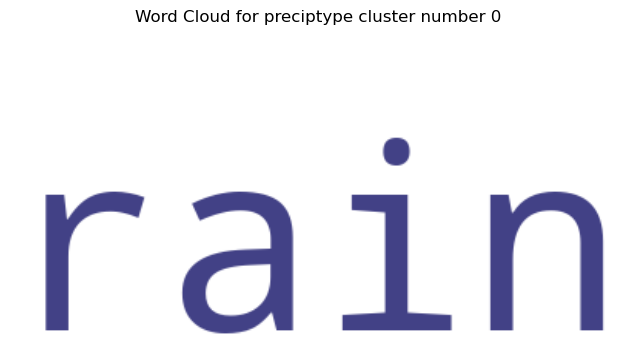

In [28]:
text = ' '.join(description for description in df_london[df_london['preciptype_clusters']==0]['preciptype'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for preciptype cluster number 0')
plt.show()

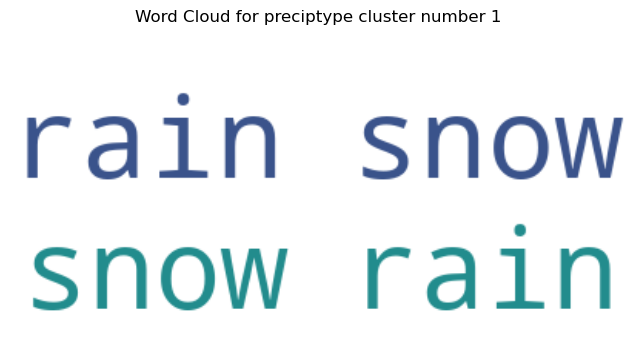

In [29]:
text = ' '.join(description for description in df_london[df_london['preciptype_clusters']==1]['preciptype'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for preciptype cluster number 1')
plt.show()

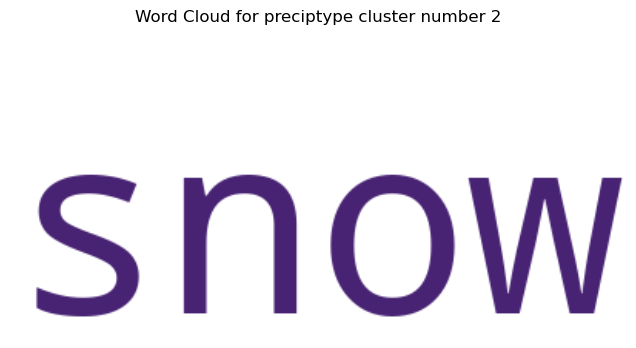

In [30]:
text = ' '.join(description for description in df_london[df_london['preciptype_clusters']==2]['preciptype'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for preciptype cluster number 2')
plt.show()

In [31]:
df_london['preciptype_clusters'].value_counts()

0    3725
1      59
2       9
Name: preciptype_clusters, dtype: int64

In [32]:
df_london = df_london.drop(columns=['preciptype'])

In [33]:
df_london.head()

,name,datetime,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,description,preciptype_clusters
0,"London, England, United Kingdom",2014-01-01,9.1,11.6,3.6,7.0,6.7,84.8,11.857,100,16.67,0.0,0.0,72.4,38.4,190.5,993.1,67.4,14.2,6.9,0.5,0,10.0,2014-01-01T08:06:14,2014-01-01T16:02:04,0.00,Partly cloudy throughout the day with a chance...,0
1,"London, England, United Kingdom",2014-01-02,9.1,11.0,3.6,7.2,6.0,81.0,5.394,100,12.50,0.0,0.0,51.8,29.8,216.2,993.4,47.4,26.7,38.3,3.3,2,10.0,2014-01-02T08:06:07,2014-01-02T16:03:08,0.03,Partly cloudy throughout the day with rain.,0
2,"London, England, United Kingdom",2014-01-03,9.0,10.6,3.2,6.5,5.1,76.8,6.030,100,16.67,0.0,0.0,77.4,33.5,218.4,994.5,52.8,17.9,30.3,2.8,2,10.0,2014-01-03T08:05:56,2014-01-03T16:04:16,0.07,Partly cloudy throughout the day with a chance...,0
3,"London, England, United Kingdom",2014-01-04,8.0,10.1,2.0,5.1,5.2,82.4,5.239,100,16.67,0.0,0.0,62.1,29.2,206.0,993.6,67.6,22.0,17.4,1.4,1,10.0,2014-01-04T08:05:42,2014-01-04T16:05:25,0.10,Partly cloudy throughout the day with a chance...,0
4,"London, England, United Kingdom",2014-01-05,6.0,12.0,-0.9,3.6,3.9,85.9,0.201,100,8.33,0.0,0.0,55.6,30.4,192.5,1000.0,66.5,25.5,30.4,2.6,2,10.0,2014-01-05T08:05:24,2014-01-05T16:06:38,0.14,Partly cloudy throughout the day with rain.,0


In [34]:
folder_path = r'C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\.data'
file_name = 'london_weather_2014-2024_updated.csv'
full_path = os.path.join(folder_path, file_name)

# Save the DataFrame to the specified path
df_london.to_csv(full_path)

In [36]:
df_london.head()

,name,datetime,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,description,preciptype_clusters
0,"London, England, United Kingdom",2014-01-01,9.1,11.6,3.6,7.0,6.7,84.8,11.857,100,16.67,0.0,0.0,72.4,38.4,190.5,993.1,67.4,14.2,6.9,0.5,0,10.0,2014-01-01T08:06:14,2014-01-01T16:02:04,0.00,Partly cloudy throughout the day with a chance...,0
1,"London, England, United Kingdom",2014-01-02,9.1,11.0,3.6,7.2,6.0,81.0,5.394,100,12.50,0.0,0.0,51.8,29.8,216.2,993.4,47.4,26.7,38.3,3.3,2,10.0,2014-01-02T08:06:07,2014-01-02T16:03:08,0.03,Partly cloudy throughout the day with rain.,0
2,"London, England, United Kingdom",2014-01-03,9.0,10.6,3.2,6.5,5.1,76.8,6.030,100,16.67,0.0,0.0,77.4,33.5,218.4,994.5,52.8,17.9,30.3,2.8,2,10.0,2014-01-03T08:05:56,2014-01-03T16:04:16,0.07,Partly cloudy throughout the day with a chance...,0
3,"London, England, United Kingdom",2014-01-04,8.0,10.1,2.0,5.1,5.2,82.4,5.239,100,16.67,0.0,0.0,62.1,29.2,206.0,993.6,67.6,22.0,17.4,1.4,1,10.0,2014-01-04T08:05:42,2014-01-04T16:05:25,0.10,Partly cloudy throughout the day with a chance...,0
4,"London, England, United Kingdom",2014-01-05,6.0,12.0,-0.9,3.6,3.9,85.9,0.201,100,8.33,0.0,0.0,55.6,30.4,192.5,1000.0,66.5,25.5,30.4,2.6,2,10.0,2014-01-05T08:05:24,2014-01-05T16:06:38,0.14,Partly cloudy throughout the day with rain.,0
